# 1D Cellular Automata
from very simple rules, we can still generate complexity - does biology take advantage of this fact?

# Main Components
* universe - space or grid where intx occur
* states that points or cells on grid occupy
* neighborhood - what information an individual cell can consider
* intx rules - how a cell decides what to do based on its current state (any history of states, etc) and its neighborhood


## Meta Programming Skills
* the package numpy
    * think of this as the 'linear algebra' package
* basic aspects for any model
    * initial conditions
    * state variables
    * boundary conditions
    * time scales
    * computational considerations

In [2]:
import numpy as np

# Define universe as numpy array
universe = np.zeros((1, 21))

print(universe)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


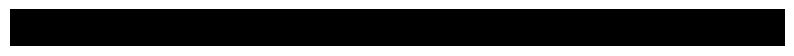

In [3]:
# Visualize the simulation
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

# Turn off the axis
plt.axis('off')

# Now to show the universe
plt.imshow(universe, cmap = 'gray')

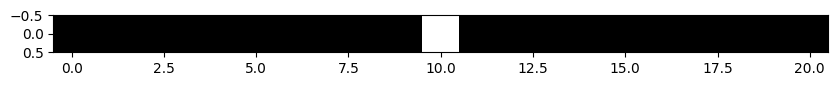

In [4]:
# Change the states of one of the spaces in our universe

# Binary states represented as 0 and 1

universe[0, 10] = 1 # Change central state to 1

plt.imshow(universe, cmap = 'gray')

## In Class Activity
generate a line of code that allows you to randomly populate your universe with 0s and 1s:

[0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1]


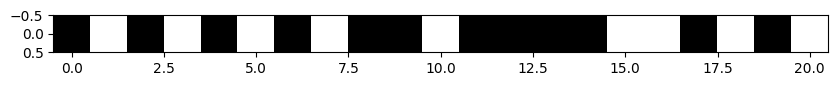

In [5]:
#test

import random

universe = np.random.randint(2, size = (1, 21))
plt.imshow(universe, cmap = 'gray')

for i in universe:
    x = random.randint(0, 1)
    if x > .5:
        x = 1
    universe[0, 10] = x


for i in universe:
    print(i)

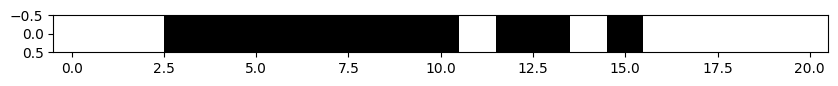

In [6]:
universe = np.random.randint(2, size = (1, 21))
plt.imshow(universe, cmap = 'gray')

## Define the neighborhood

what are the definitions that we want to choose to define the simplest possible neighborhood?

we will define the left, home, right --> simplest possible neighborhood

2^3 = 8 possible neighborhoods (neighborhood configurations)

In [7]:
def rules(left, home, right, config):
    if (left == 0) & (home == 0) & (right == 0): # enumerate a possible neighborhood
        return config[0] # output config
    if (left == 1) & (home == 0) & (right == 0): # enumerate a possible neighborhood
        return config[1] # output config
    if (left == 0) & (home == 1) & (right == 0): # enumerate a possible neighborhood
        return config[2] # output config
    if (left == 1) & (home == 1) & (right == 0): # enumerate a possible neighborhood
        return config[3] # output config
    if (left == 0) & (home == 0) & (right == 1): # enumerate a possible neighborhood
        return config[4] # output config
    if (left == 1) & (home == 0) & (right == 1): # enumerate a possible neighborhood
        return config[5] # output config
    if (left == 0) & (home == 1) & (right == 1): # enumerate a possible neighborhood
        return config[6] # output config
    if (left == 1) & (home == 1) & (right == 1): # enumerate a possible neighborhood
        return config[7] # output config

In [8]:
# testing the rules function
config = np.array([1, 0, 1, 1, 0, 1, 1, 1])

left = 0
right = 1
home = 1

rules(left, home, right, config)

1

We need a function that takes in a particular set of initial conditions
It needs to take a particular rule set, (or config file)
Function should return a new universe that has been updated based on the rules

In [9]:
def generate(universe, config):
    #it should return a new universe, let's initiate the new universe
    newuniverse = np.zeros((1, universe.size))

    for i in np.arange(universe.size):

        # boundary conditions
        # ignore the farthest left and farthest right elements
        if (i != 0) & (i != universe.size - 1):

            left = universe[0, i-1]
            home = universe[0, i]
            right = universe[0, i+1]

            newuniverse[0, i] = rules(left, home, right, config)

    return newuniverse

In [10]:
# check that the generate function works
config = np.array([1, 0, 1, 0, 1, 0, 1, 1])
universe = np.zeros((1, 21))
newuniverse = generate(universe, config)

print(universe)
print(newuniverse)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]]


In [11]:
print(np.arange(universe.size))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [12]:
print(universe.size - 1)

20


# Quickly Review Dimensions

In [13]:
universe = np.zeros(21)
universe.shape

universe = np.zeros((1, 21))
universe.shape

universe = np.zeros((1, 1, 21))
universe.shape

(1, 1, 21)

# Binary Representation

for a 2 bit number we have two spaces

0 = [0,0]

1 = [0,1]

2 = [1,0]

3 = [1,1]


a function to generate binary numbers:

In [14]:
binum = np.binary_repr(5, width = 8)
print(binum)

00000101


In [15]:
# Lets make a wrapper to get the binary array in the correct representation

def num2binArray(num):
    binstr = np.binary_repr(num, width = 8)
    binArray = np.empty(0)
    for i in binstr:
        binArray = np.append(binArray,int(i))
    return np.flip(binArray)

In [16]:
# test num2binArray

num2binArray(30)

array([0., 1., 1., 1., 1., 0., 0., 0.])

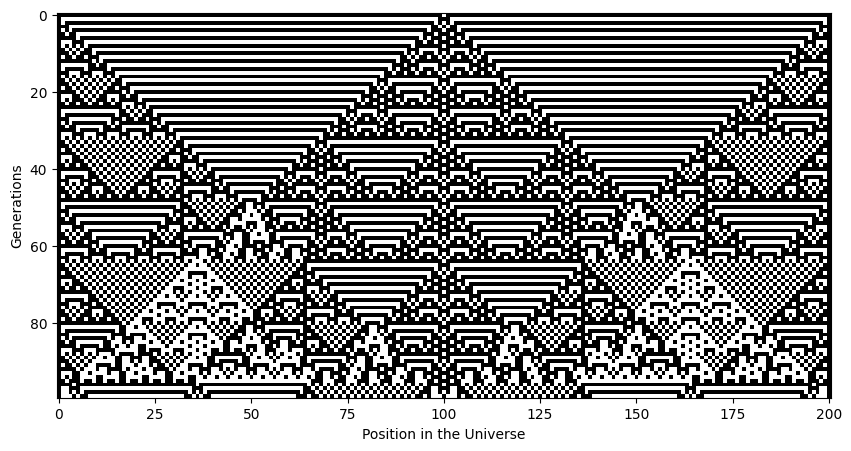

In [17]:
# Run the simulation through 100 generations
# Think about time in terms of "generations"

# as simulators, we assign "time" to each generation
t = 100

# Set up a particular rule set (or configuration)
config = num2binArray(105)

# Estanblish the universe and the initial conditions
universe = np.zeros((1, 201))
universe[0,100] = 1

# Establish a memory store of generations 
stateMemory = np.zeros((t, universe.size))

# For loop to iteratively run the simulation
for i in range(t):
    stateMemory[i,:] = universe
    newuniverse = generate(universe, config)
    universe = newuniverse

# Visualization of the simulation

plt.axis('on')
plt.ylabel("Generations")
plt.xlabel("Position in the Universe")
plt.imshow(stateMemory, cmap = 'gray')

examples of classes of patterns:

class #1: uniformity = 222

class #2: repetitive = 190

class #3: random = 30

class #4: complex = 110

    - the boundary of randomness and uniformity